In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lettura dei tempi di esecuzione

In [106]:
parallel = pd.read_csv("parallel_tests.csv", delimiter=";")
sequential = pd.read_csv("seq_tests.csv", delimiter=";")

In [107]:
parallel = parallel.drop(parallel[parallel["B"] == 40].index)

## Grafici

In [113]:
def plot_times(filter_cols, x="Size"):
    y = "Time"
    filter_par = parallel.loc[filter_cols(parallel), :]
    filter_seq = sequential.loc[filter_cols(sequential), :]
    plt.plot(filter_par[x], filter_par[y], label="Parallel time")
    plt.plot(filter_seq[x], filter_seq[y], label="Sequential time")
    plt.ylabel("Time")
    plt.legend()

### Confronto basato sulla dimensione della griglia

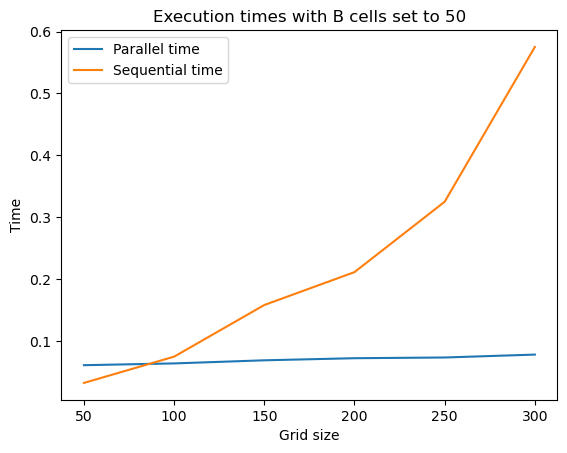

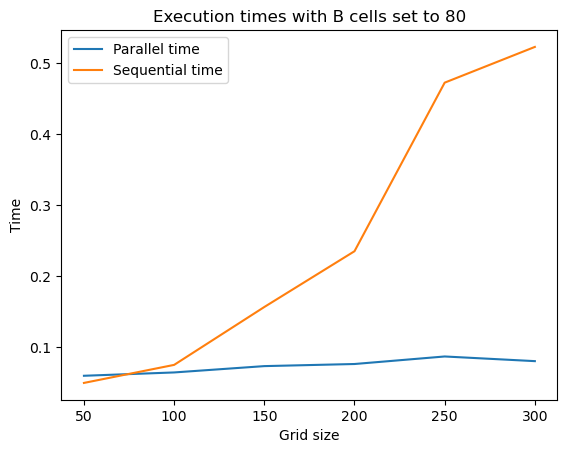

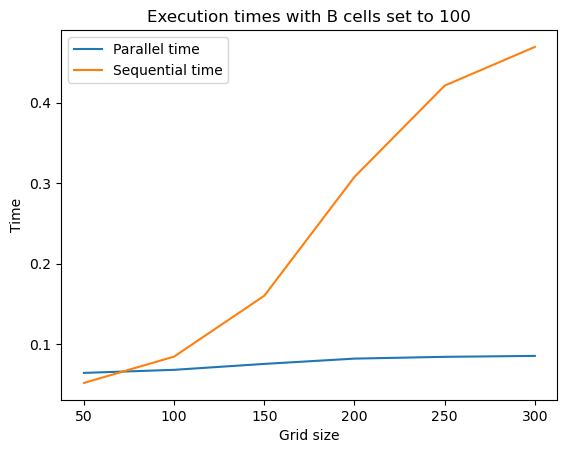

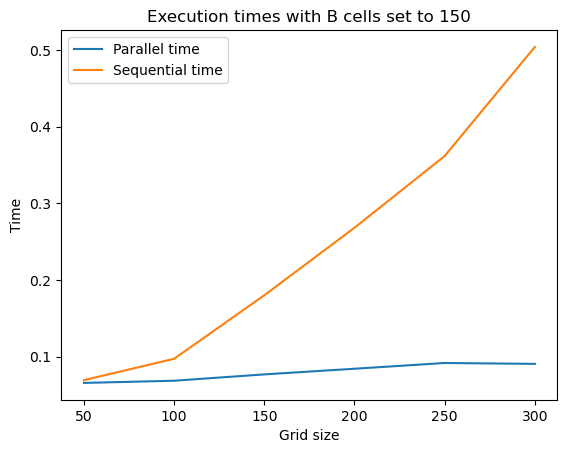

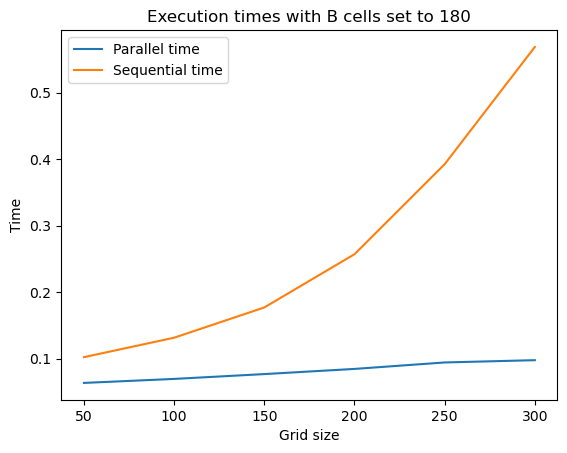

In [114]:
B_values = sequential["B"].unique()
for b in B_values:
    plot_times(filter_cols=lambda df: df["B"] == b)
    plt.title(f"Execution times with B cells set to {b}")
    plt.xlabel("Grid size")
    plt.show()

### Confronto basato sul numero di linfociti B

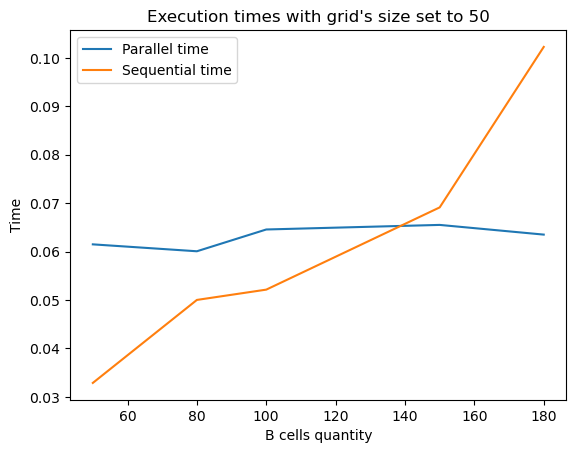

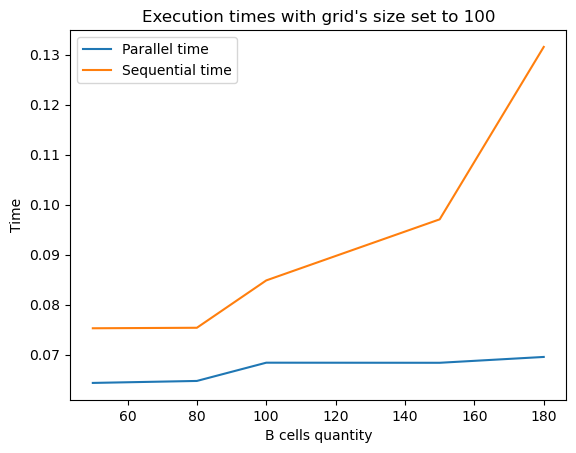

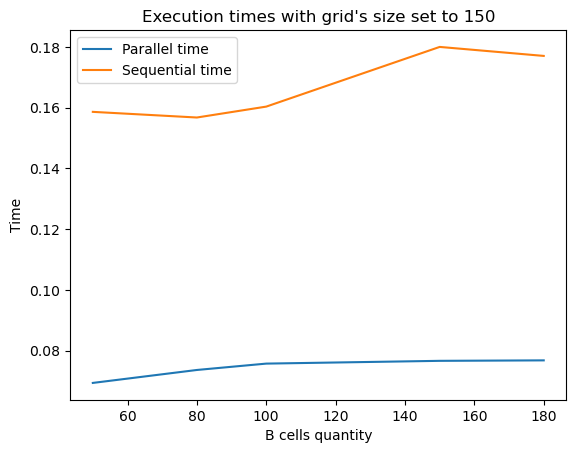

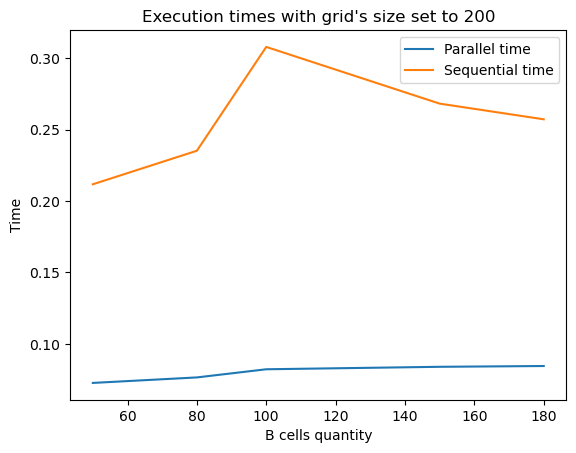

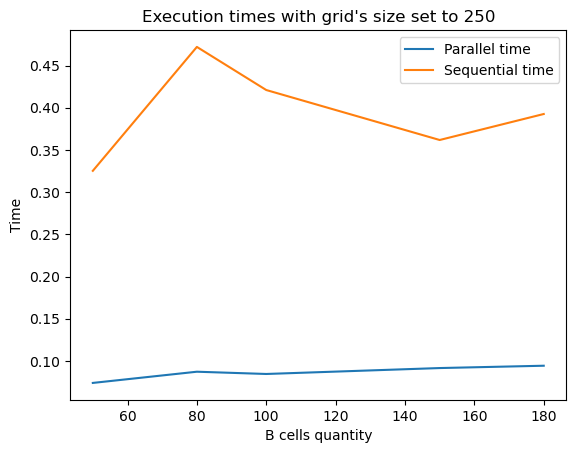

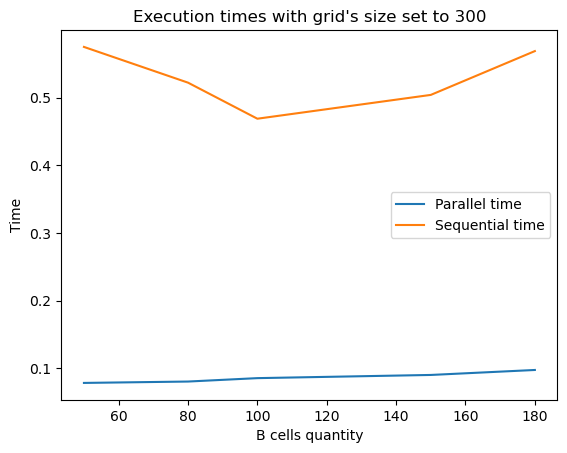

In [115]:
sizes = sequential["Size"].unique()
for size in sizes:
    plot_times(filter_cols=lambda df: df["Size"] == size, x="B")
    plt.title(f"Execution times with grid's size set to {size}")
    plt.xlabel("B cells quantity")
    plt.show()

## Speedup

In [119]:
times = parallel.rename(columns={"Time": "Parallel"}).reset_index()
times["Sequential"] = sequential["Time"]
times["Speedup"] = times["Sequential"] / times["Parallel"]

In [125]:
def plot_speedup(filter_cols, x="Size"):
    y = "Speedup"
    filter_times = filter_cols(times)
    plt.plot(filter_times[x], filter_times[y])

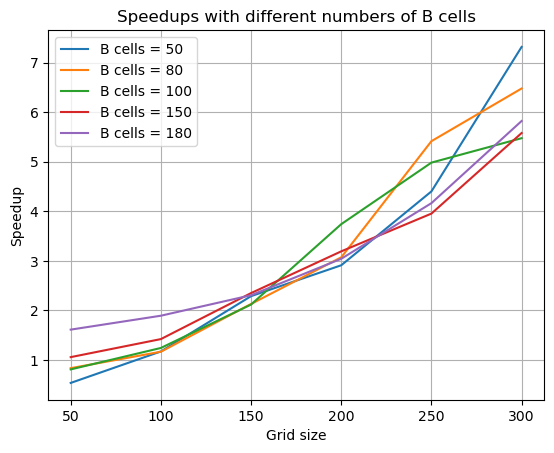

In [131]:
B_values = times["B"].unique()
for b in B_values:
    plot_speedup(filter_cols=lambda df: df[df["B"] == b])
legend = list(map(lambda b: "B cells = " + str(b), B_values))
plt.legend(legend)
plt.title(f"Speedups with different numbers of B cells")
plt.xlabel("Grid size")
plt.ylabel("Speedup")
plt.grid()
plt.show()

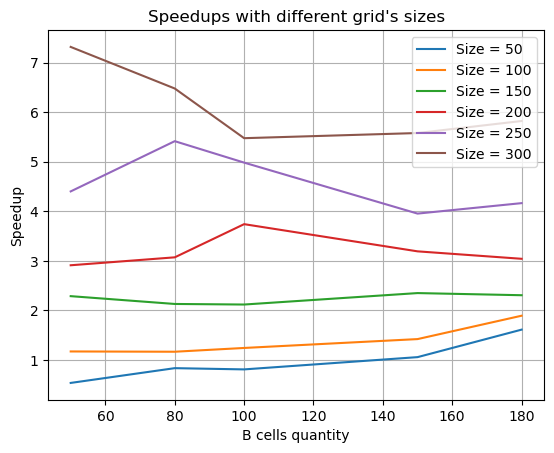

In [136]:
sizes = times["Size"].unique()
for size in sizes:
    plot_speedup(filter_cols=lambda df: df[df["Size"] == size], x="B")
legend = list(map(lambda s: "Size = " + str(s), sizes))
plt.legend(legend)
plt.title(f"Speedups with different grid's sizes")
plt.xlabel("B cells quantity")
plt.ylabel("Speedup")
plt.grid()
plt.show()